In [338]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [339]:
# switches
separateDevices = True
allDevices = True

In [340]:
# array contains all the flowResult files which belongs to this MUD flow
# DUP
all_files = [
             "AwairAirQuality_70886b100fc6.pcap", 
             "LiFXBulb_d073d5018308.pcap", 
             "PixStarPhotoFrame_e076d033bb85.pcap", 
             "RingDoorBell_884aea31669d.pcap",
             "TPLinkCamera_f4f26D9351f1.pcap", 
             "TribySpeaker_18B79E022044.pcap", 
             "AmazonEcho/DUP_CONCATANATED_AmazonEcho_44650d56ccd3", 
             "NestProtect/DUP_CONCATANATED_NestProtect_18b43025bee4",
             "WithingsSleepSensor/DUP_CONCATANATED_WithingsSleepSensor_0024e42028c6"
             ]    

In [341]:
# Global plot pattern for the entire notebook

# plotPattern = 'scatter'
plotPattern = 'hist'

# cmap = "viridis"
# cmap = "inferno"
# cmap = "bwr"
# cmap = "RdBu"
cmap = "RdYlBu"

# cbar = True
cbar = False

# log scale for the bin values of the histograms
scale = 10

# multiple value for seaborn hist
# multi = 'stack'
# multi = 'layer'
multi = 'dodge'
# multi = 'fill'

## Total Number of Content Checks

In [342]:
# paths of other files  
path = "V4/EtherTypeORIPProtoCheck/numberOfChecks/"     
statType = "_numberOfChecks.csv"

In [343]:
# loading all the files as pandas dataframes
all_dfs = []

for filename in all_files:
    df = pd.read_csv("../../../data/statistics/" + path + filename + statType)
    all_dfs.append(df)

In [344]:
all_dfs[0].columns

Index(['ipFlow', ' numOfChecks', ' boolMatchFound', ' numOfMatches'], dtype='object')

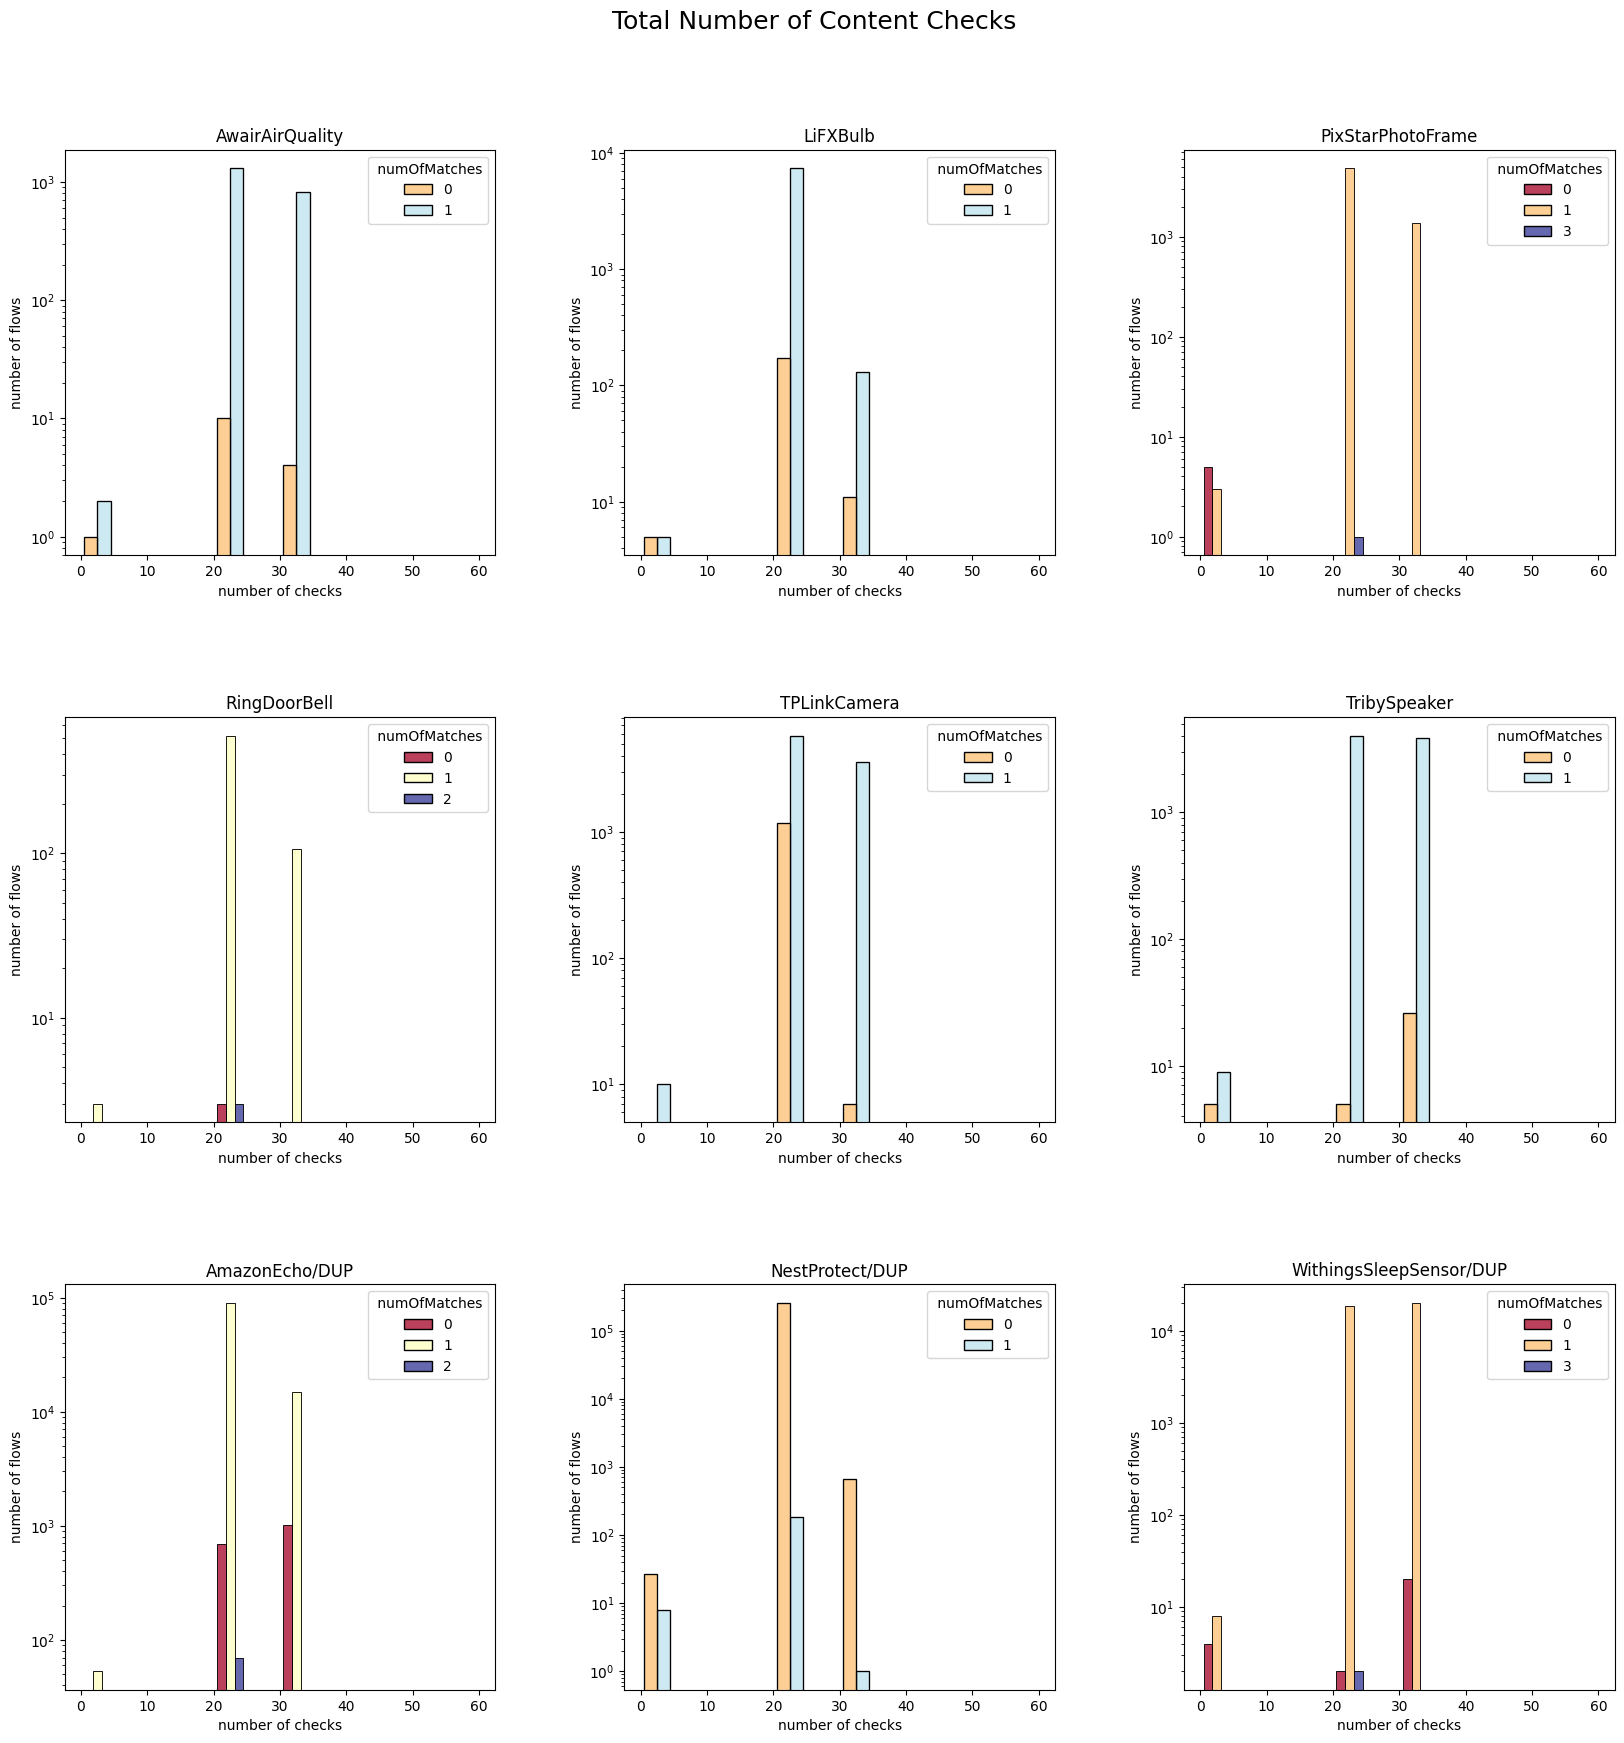

In [345]:
if separateDevices:
    # define subplot grid
    plotRows = math.ceil(len(all_dfs) / 3)
    plotCols = 3


    fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(20, 20))
    plt.subplots_adjust(hspace=.4, wspace=.3)
    fig.suptitle("Total Number of Content Checks", fontsize=18, y=0.95)

    pos = 0
    for df, ax in zip(all_dfs, axs.ravel()):
        # filter df for ticker and plot on specified axes
        # df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', edgecolor='k', s=20, linewidths=.5, alpha=1, kind=plotPattern)
        # df[' boolMatchFound'] = pd.Categorical(df[' boolMatchFound'])
        # df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar)

        if plotPattern == "hist":
            sns.histplot(ax=ax, data=df, x=' numOfChecks', hue=' numOfMatches', multiple=multi, shrink=.8, bins=12, binrange=(0,60), palette=cmap, log_scale=(None,scale))
            ax.set_xlabel("number of checks")
            ax.set_ylabel("number of flows")

        else:
            df[' numOfMatches'] = pd.Categorical(df[' numOfMatches'])
            df.plot(ax=ax, x='ipFlow', y=' numOfChecks', c=' numOfMatches', colormap=cmap, kind=plotPattern, colorbar=cbar)


        ax.set_title(all_files[pos].split("_")[0])
        pos+=1
        # chart formatting

    plt.show()

/tmp/ipykernel_139670/1508508901.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')
/tmp/ipykernel_139670/1508508901.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')
/tmp/ipykernel_139670/1508508901.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')
/tmp/ipykernel_139670/1508508901.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')
/tmp/ipykernel_139670/1508508901.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', '

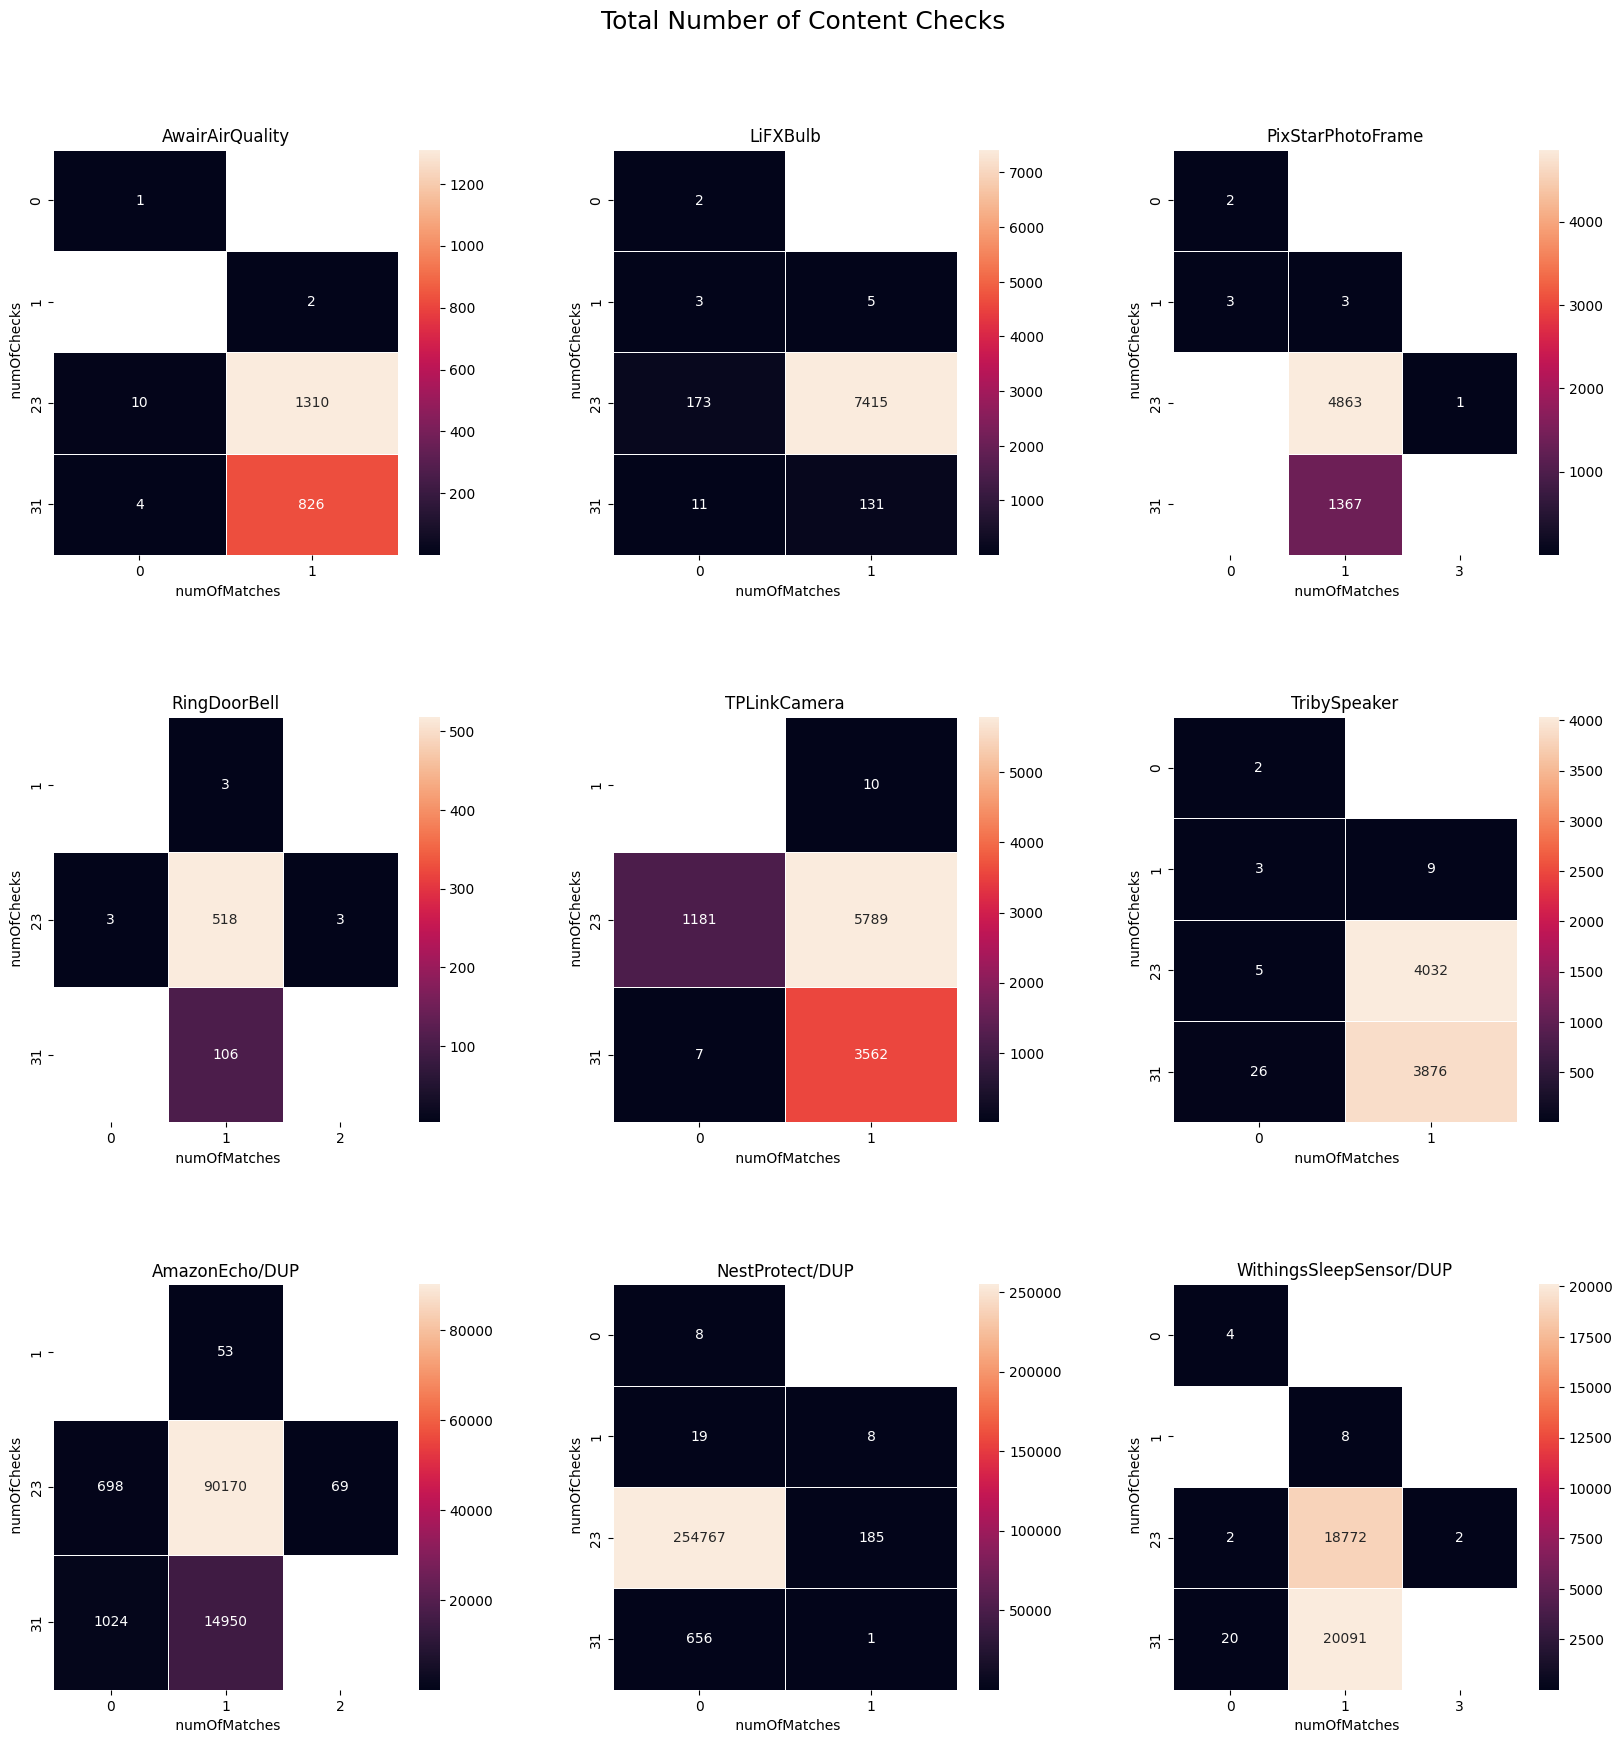

In [346]:
if separateDevices:
    # define subplot grid
    plotRows = math.ceil(len(all_dfs) / 3)
    plotCols = 3


    fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(20, 20))
    plt.subplots_adjust(hspace=.4, wspace=.3)
    fig.suptitle("Total Number of Content Checks", fontsize=18, y=0.95)

    pos = 0
    for df, ax in zip(all_dfs, axs.ravel()):
        
        heat = df.groupby([' numOfMatches', ' numOfChecks'])['ipFlow'].count().reset_index(name='count')
        heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')

        
        sns.heatmap(heatPIV, annot=True, fmt=".0f", linewidths=.5, ax=ax)
        
        ax.set_title(all_files[pos].split("_")[0])
        pos+=1
        # chart formatting

    plt.show()

#### Concatanating all the dataframes to get a single one for all the pcaps

In [347]:
total_df = pd.concat(all_dfs, axis=0, ignore_index=True)
display(total_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ipFlow           436774 non-null  int64
 1    numOfChecks     436774 non-null  int64
 2    boolMatchFound  436774 non-null  int64
 3    numOfMatches    436774 non-null  int64
dtypes: int64(4)
memory usage: 13.3 MB


None

In [348]:
total_df.info()
print(total_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ipFlow           436774 non-null  int64
 1    numOfChecks     436774 non-null  int64
 2    boolMatchFound  436774 non-null  int64
 3    numOfMatches    436774 non-null  int64
dtypes: int64(4)
memory usage: 13.3 MB
Index(['ipFlow', ' numOfChecks', ' boolMatchFound', ' numOfMatches'], dtype='object')


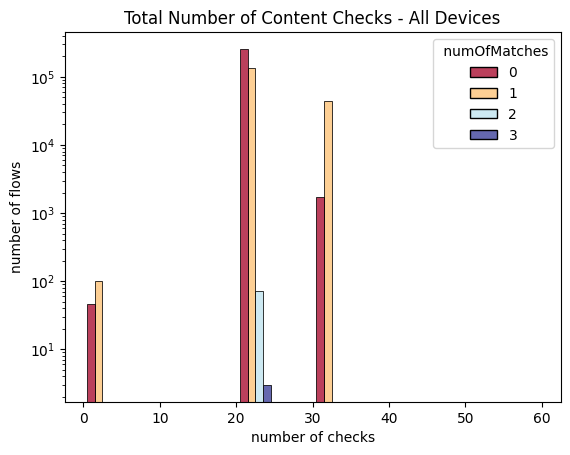

In [349]:
if allDevices:
    if plotPattern == "hist":
        ax = sns.histplot(data=total_df, x=' numOfChecks', hue=' numOfMatches', multiple=multi, shrink=.8, bins=12, binrange=(0,60), palette=cmap, log_scale=(None,scale))
        ax.set_xlabel("number of checks")
        ax.set_ylabel("number of flows")
        ax.set_title("Total Number of Content Checks - All Devices")
    else:
        total_df[' numOfMatches'] = pd.Categorical(total_df[' numOfMatches'])
        ax = total_df.plot(x='ipFlow', y=' numOfChecks', c=' numOfMatches', colormap=cmap, kind=plotPattern, colorbar=cbar, title="Without Using Ports")
        ax.set_title("Number of Content Checks Before a Match - All Devices")

    plt.show()


/tmp/ipykernel_139670/3790728922.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')


<Axes: xlabel=' numOfMatches', ylabel=' numOfChecks'>

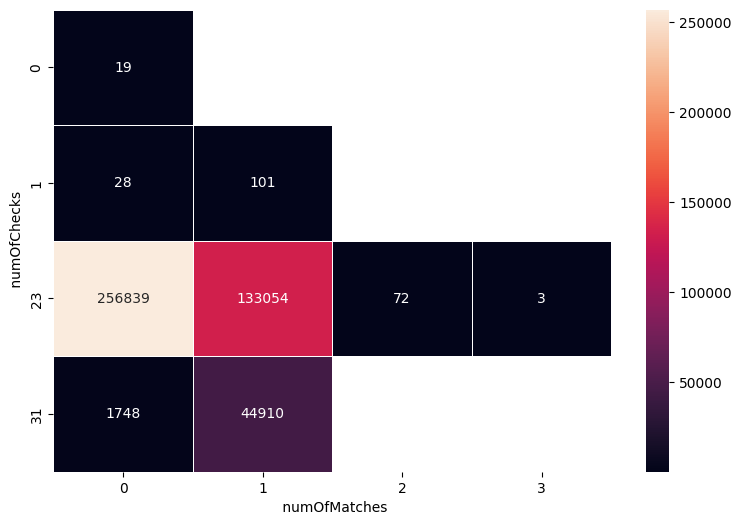

In [350]:
heat = total_df.groupby([' numOfMatches', ' numOfChecks'])[' numOfMatches'].count().reset_index(name='count')
heatPIV = heat.pivot(' numOfChecks', ' numOfMatches', 'count')

# # Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatPIV, annot=True, fmt=".0f", linewidths=.5, ax=ax)

## Number of Checks Until the First Match

In [351]:
# paths of other files   
path = "V4/EtherTypeORIPProtoCheck/numberOfChecks_untilFirstMatch/"     
statType = "_numberOfChecks_untilFirstMatch.csv"

In [352]:
# loading all the files as pandas dataframes
all_dfs = []

for filename in all_files:
    df = pd.read_csv("../../../data/statistics/" + path + filename + statType)
    all_dfs.append(df)

In [353]:
all_dfs[0].columns

Index(['ipFlow', ' numOfChecks', ' boolMatchFound', ' numOfMatches'], dtype='object')

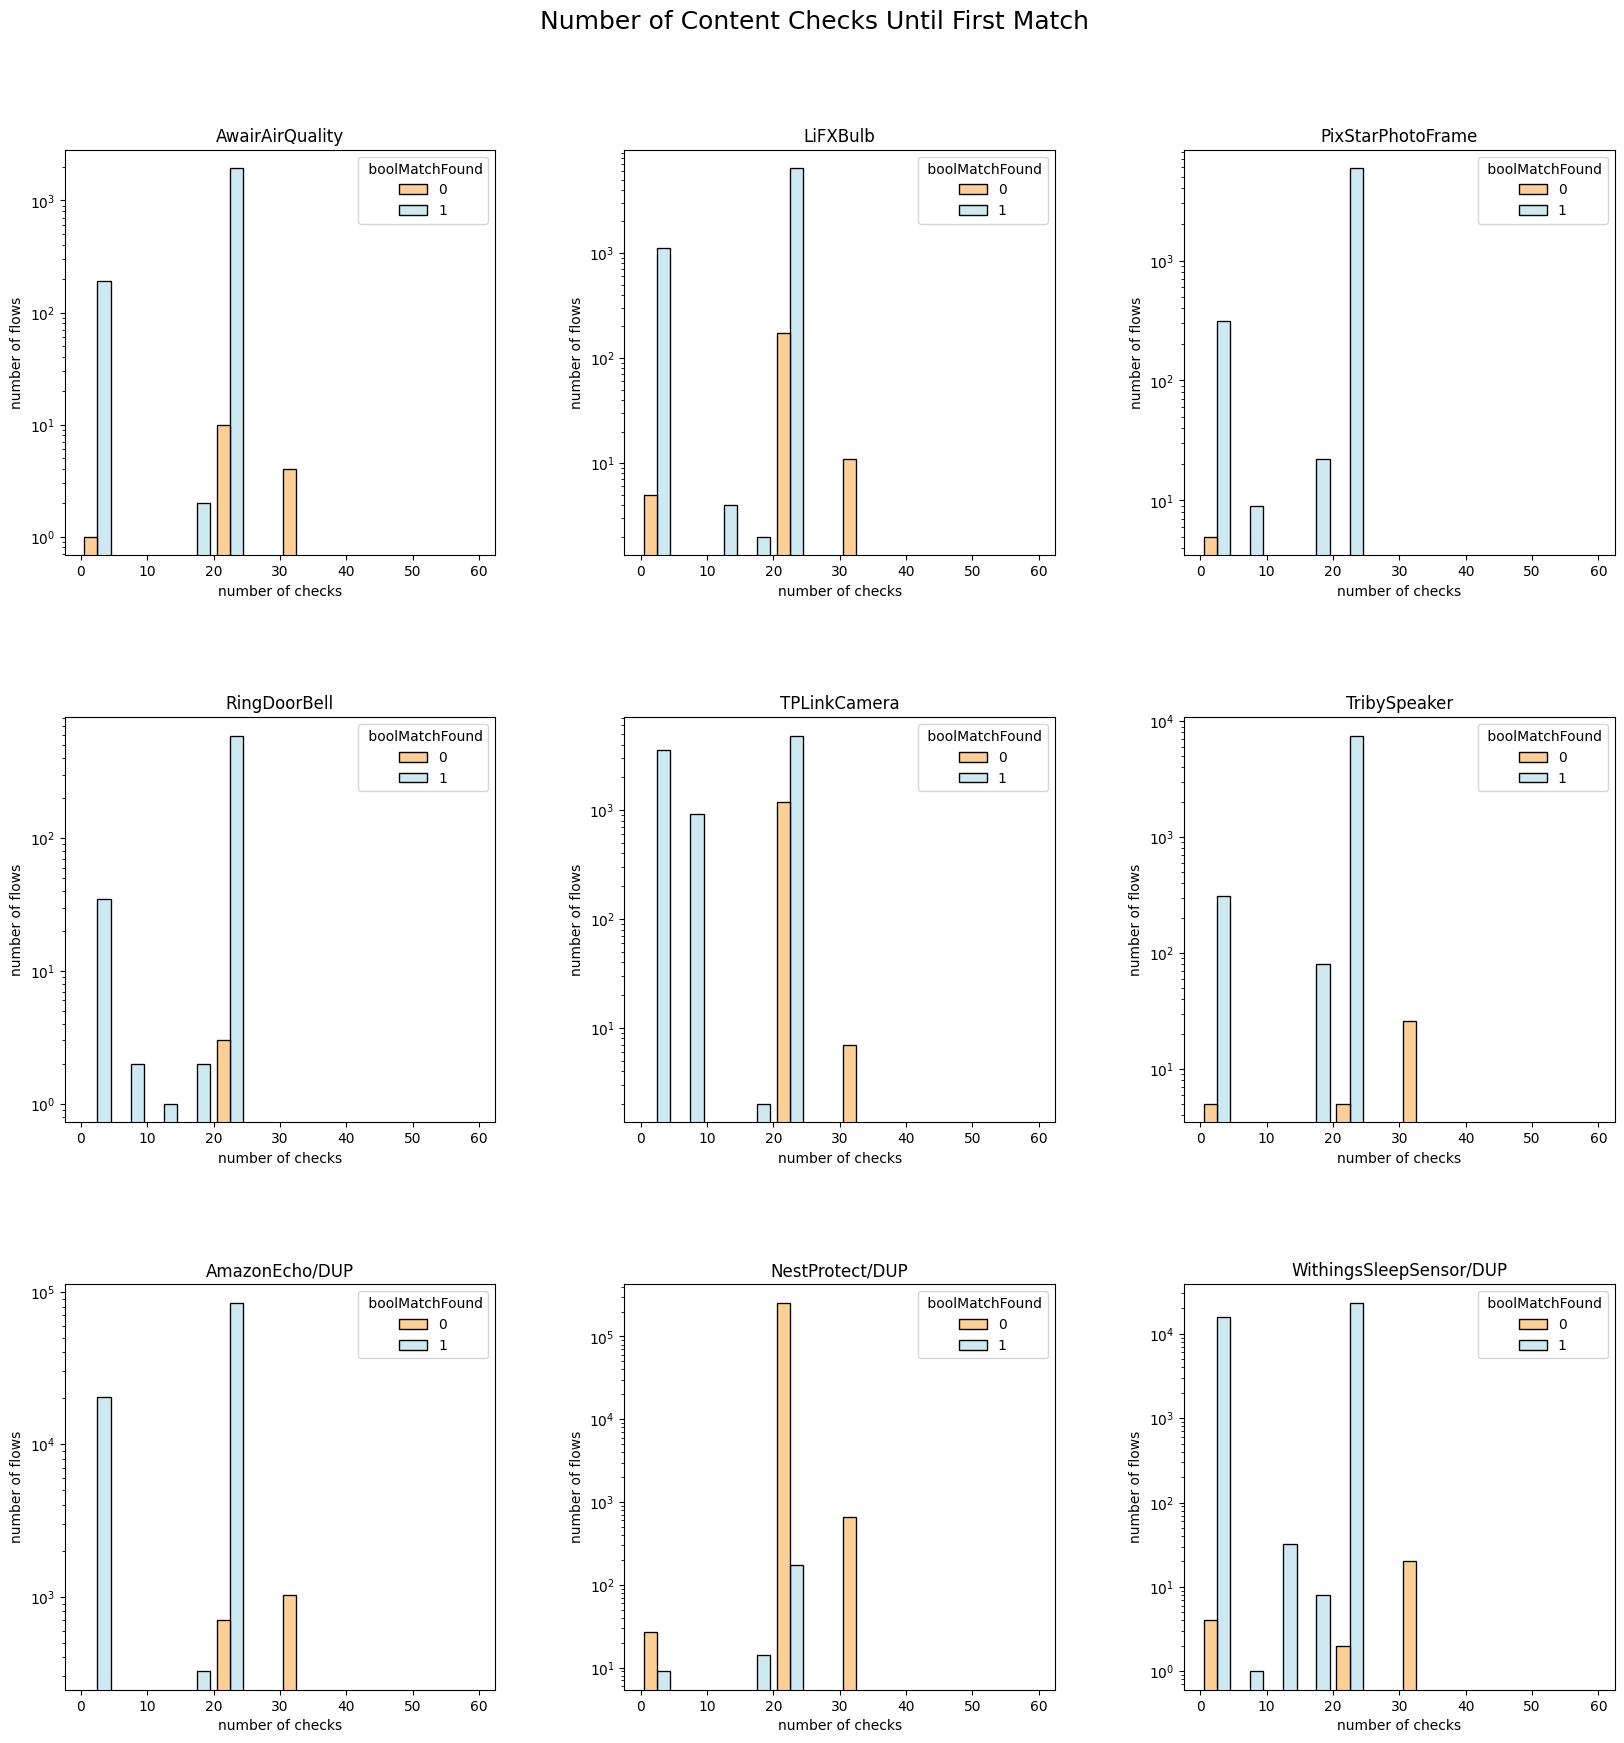

In [354]:
if separateDevices:
    # define subplot grid
    plotRows = math.ceil(len(all_dfs) / 3)
    plotCols = 3


    fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(20, 20))
    plt.subplots_adjust(hspace=.4, wspace=.3)
    fig.suptitle("Number of Content Checks Until First Match", fontsize=18, y=0.95)

    pos = 0
    for df, ax in zip(all_dfs, axs.ravel()):
        # filter df for ticker and plot on specified axes
        # df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', edgecolor='k', s=20, linewidths=.5, alpha=1, kind=plotPattern)
        # df[' boolMatchFound'] = pd.Categorical(df[' boolMatchFound'])
        # df.plot(ax=ax, x='ipFlow', y=' # of matches', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar)

        if plotPattern == "hist":
            sns.histplot(ax=ax, data=df, x=' numOfChecks', hue=' boolMatchFound', multiple=multi, shrink=.8, bins=12, binrange=(0,60), palette=cmap, log_scale=(None,scale))
            ax.set_xlabel("number of checks")
            ax.set_ylabel("number of flows")

        else:
            df[' boolMatchFound'] = pd.Categorical(df[' boolMatchFound'])
            df.plot(ax=ax, x='ipFlow', y=' numOfChecks', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar)


        ax.set_title(all_files[pos].split("_")[0])
        pos+=1
        # chart formatting

    plt.show()

/tmp/ipykernel_139670/2680997574.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')
/tmp/ipykernel_139670/2680997574.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')
/tmp/ipykernel_139670/2680997574.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')
/tmp/ipykernel_139670/2680997574.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')
/tmp/ipykernel_139670/2680997574.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfCh

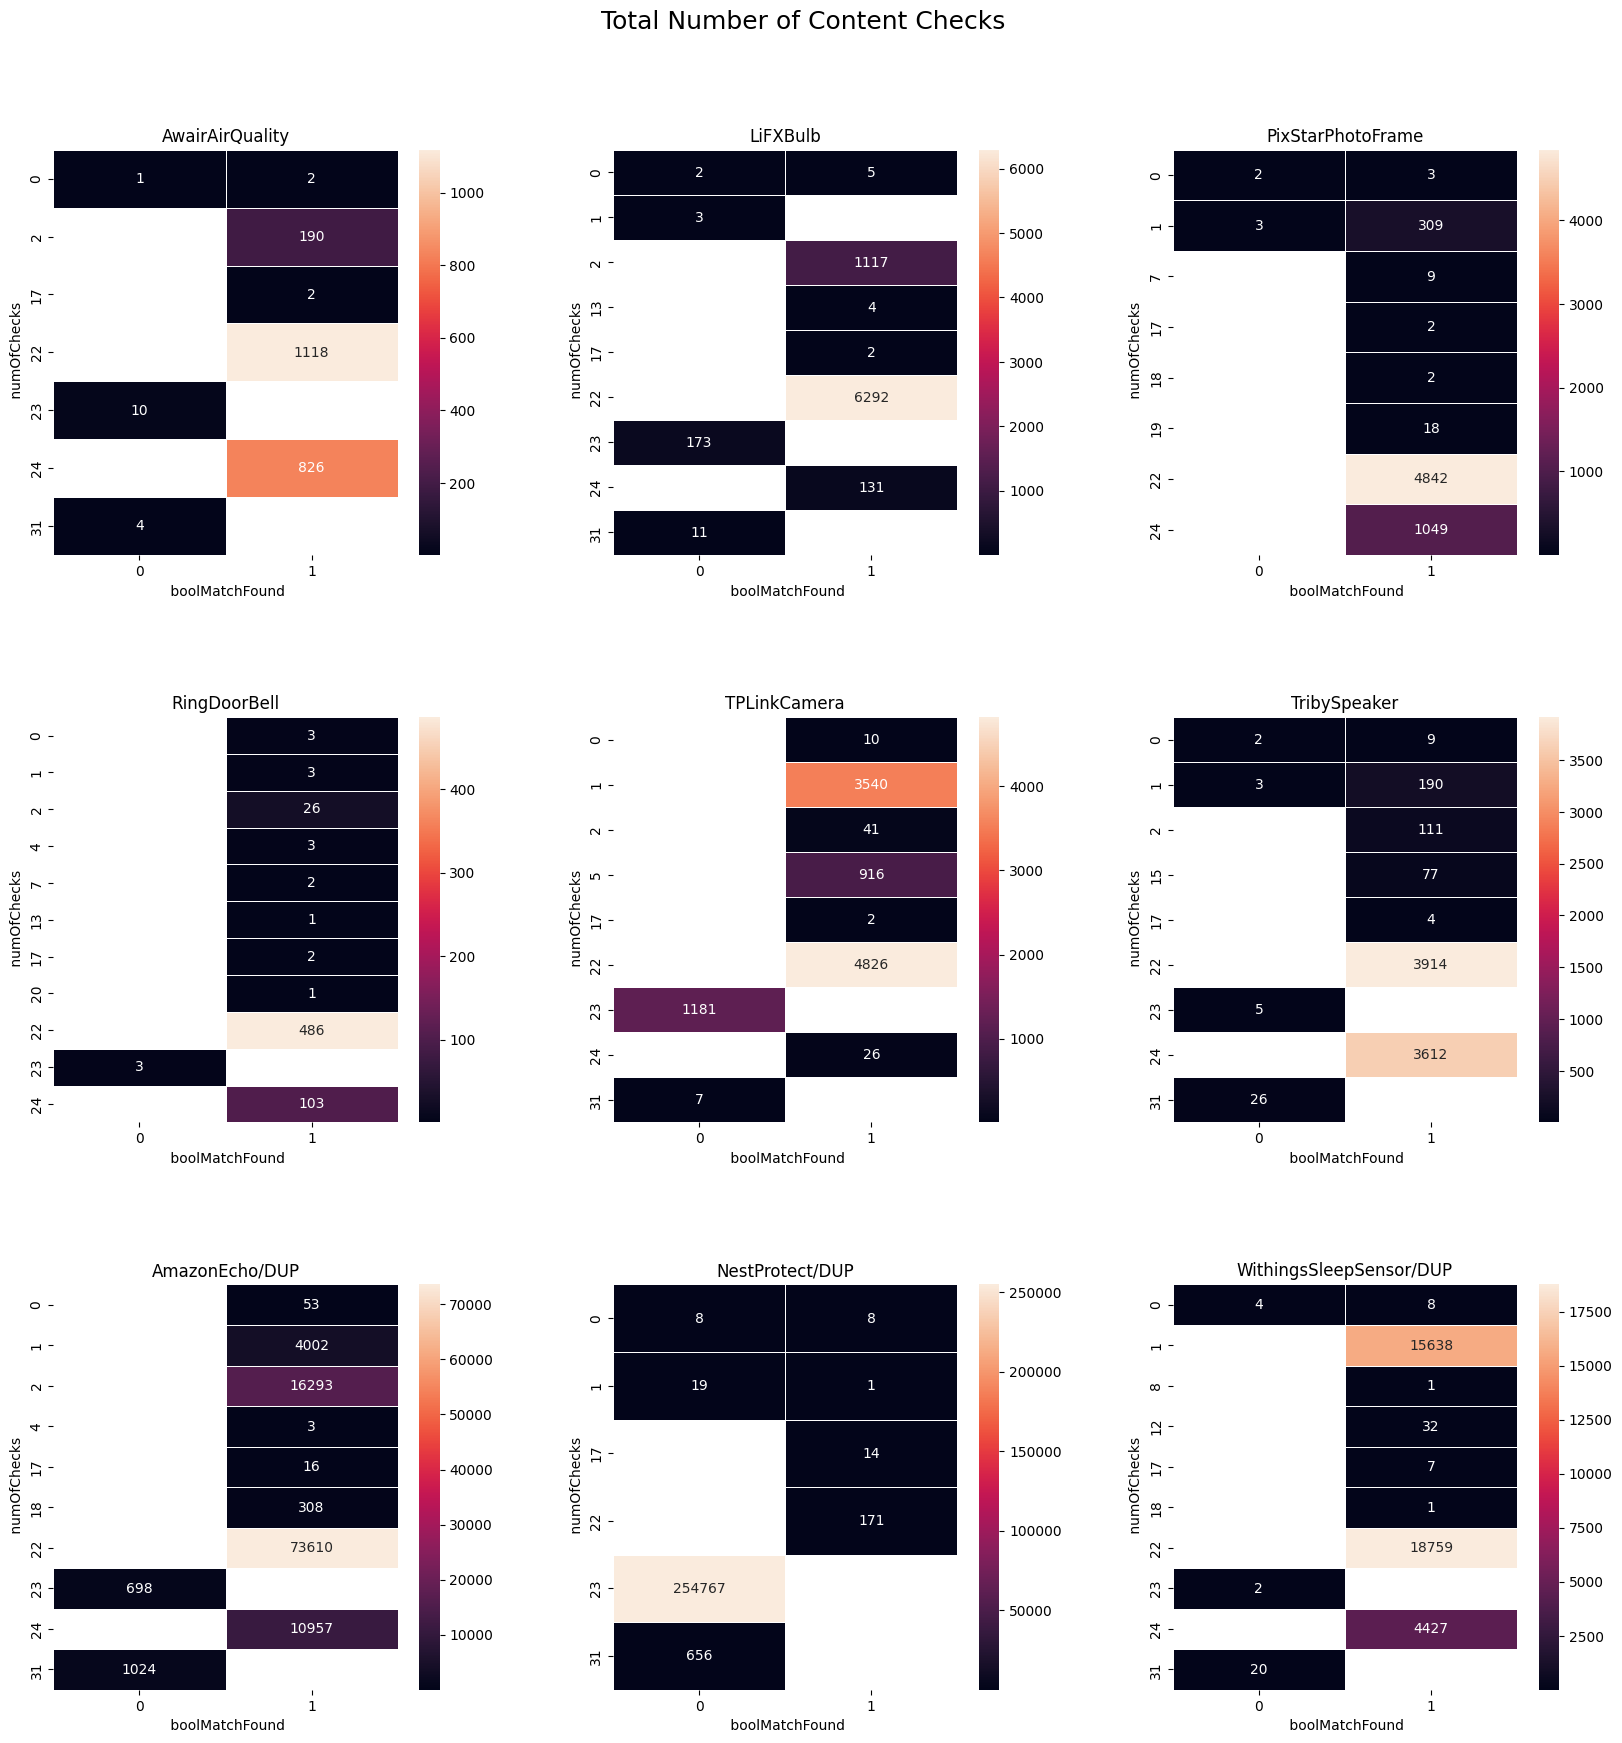

In [355]:
if separateDevices:
    # define subplot grid
    plotRows = math.ceil(len(all_dfs) / 3)
    plotCols = 3


    fig, axs = plt.subplots(nrows=plotRows, ncols=plotCols, figsize=(20, 20))
    plt.subplots_adjust(hspace=.4, wspace=.3)
    fig.suptitle("Total Number of Content Checks", fontsize=18, y=0.95)

    pos = 0
    for df, ax in zip(all_dfs, axs.ravel()):
        
        heat = df.groupby([' boolMatchFound', ' numOfChecks'])['ipFlow'].count().reset_index(name='count')
        heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')

        
        sns.heatmap(heatPIV, annot=True, fmt=".0f", linewidths=.5, ax=ax)
        
        ax.set_title(all_files[pos].split("_")[0])
        pos+=1
        # chart formatting

    plt.show()

#### Concatanating all the dataframes to get a single one for all the pcaps

In [356]:
total_df = pd.concat(all_dfs, axis=0, ignore_index=True)
display(total_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ipFlow           436774 non-null  int64
 1    numOfChecks     436774 non-null  int64
 2    boolMatchFound  436774 non-null  int64
 3    numOfMatches    436774 non-null  int64
dtypes: int64(4)
memory usage: 13.3 MB


None

In [357]:
total_df.info()
print(total_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436774 entries, 0 to 436773
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   ipFlow           436774 non-null  int64
 1    numOfChecks     436774 non-null  int64
 2    boolMatchFound  436774 non-null  int64
 3    numOfMatches    436774 non-null  int64
dtypes: int64(4)
memory usage: 13.3 MB
Index(['ipFlow', ' numOfChecks', ' boolMatchFound', ' numOfMatches'], dtype='object')


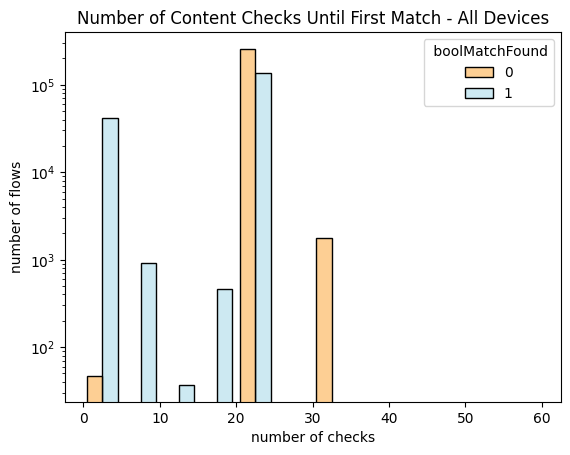

In [358]:
if allDevices:
    if plotPattern == "hist":    
        ax = sns.histplot(data=total_df, x=' numOfChecks', hue=' boolMatchFound', multiple=multi, shrink=.8, bins=12, binrange=(0,60), palette=cmap, log_scale=(None,scale))
        ax.set_xlabel("number of checks")
        ax.set_ylabel("number of flows")
        ax.set_title("Number of Content Checks Until First Match - All Devices")
    else:
        total_df[' boolMatchFound'] = pd.Categorical(total_df[' boolMatchFound'])
        ax = total_df.plot(x='ipFlow', y=' numOfChecks', c=' boolMatchFound', colormap=cmap, kind=plotPattern, colorbar=cbar, title="Without Using Ports")
        ax.set_title("Number of Content Checks Before a Match - All Devices")

    plt.show()


/tmp/ipykernel_139670/3261919979.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')


<Axes: xlabel=' boolMatchFound', ylabel=' numOfChecks'>

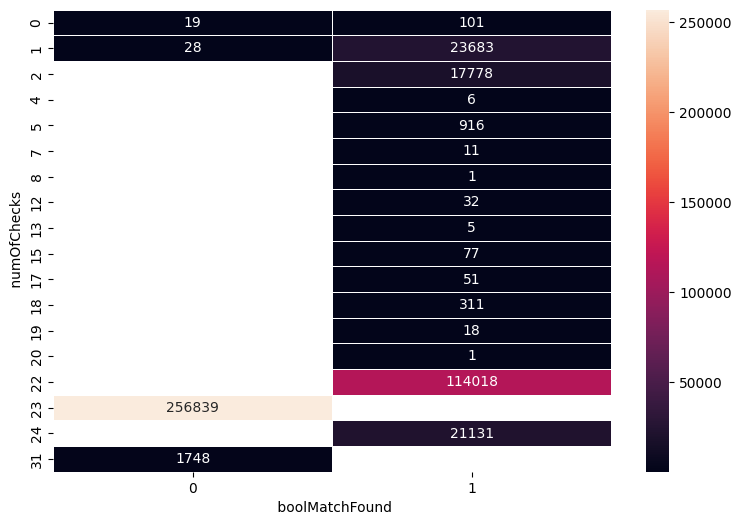

In [359]:
heat = total_df.groupby([' boolMatchFound', ' numOfChecks'])[' numOfMatches'].count().reset_index(name='count')
heatPIV = heat.pivot(' numOfChecks', ' boolMatchFound', 'count')

# # Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatPIV, annot=True, fmt=".0f", linewidths=.5, ax=ax)